In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Ranking of Airbnb Barons.csv")

/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_52732/3242966263.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x="total_listings", y="host_name", palette="Set2")


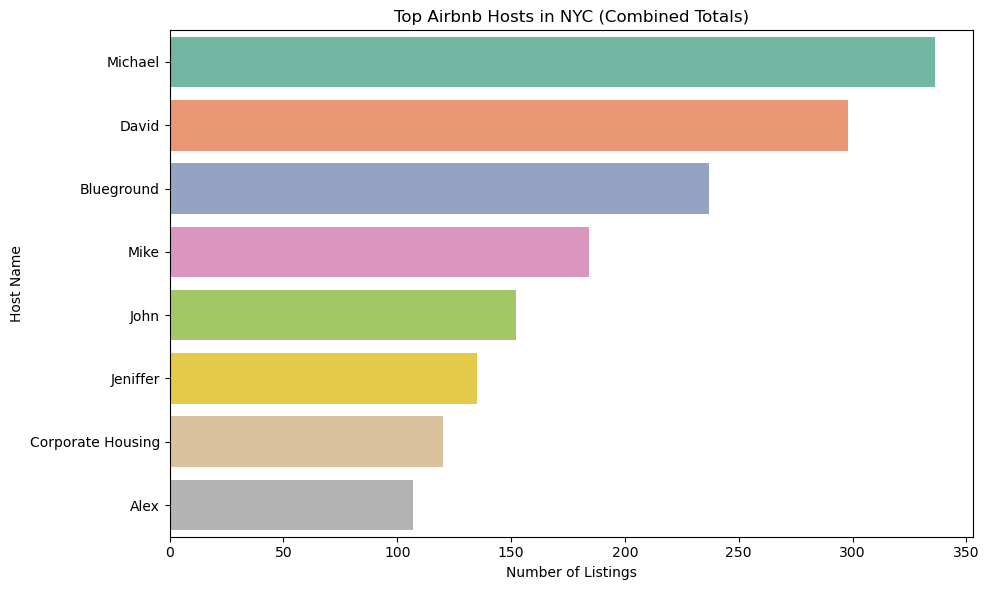

In [9]:
data = {
    "host_name": ["Blueground","Michael","Mike","David","John","Michael","Jeniffer","David","Corporate Housing","Alex"],
    "total_listings": [237,186,184,176,152,150,135,122,120,107],
    "neighbourhood_group": ["Manhattan","Manhattan","Manhattan","Manhattan","Manhattan","Brooklyn","Manhattan","Brooklyn","Manhattan","Manhattan"]
}

df = pd.DataFrame(data)

# Agrupar por host_name (sumando listados de diferentes barrios)
df_grouped = df.groupby("host_name", as_index=False)["total_listings"].sum()

# Ordenar
df_grouped = df_grouped.sort_values(by="total_listings", ascending=False)

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(data=df_grouped, x="total_listings", y="host_name", palette="Set2")

plt.title("Top Airbnb Hosts in NYC (Combined Totals)")
plt.xlabel("Number of Listings")
plt.ylabel("Host Name")

plt.tight_layout()
plt.show()

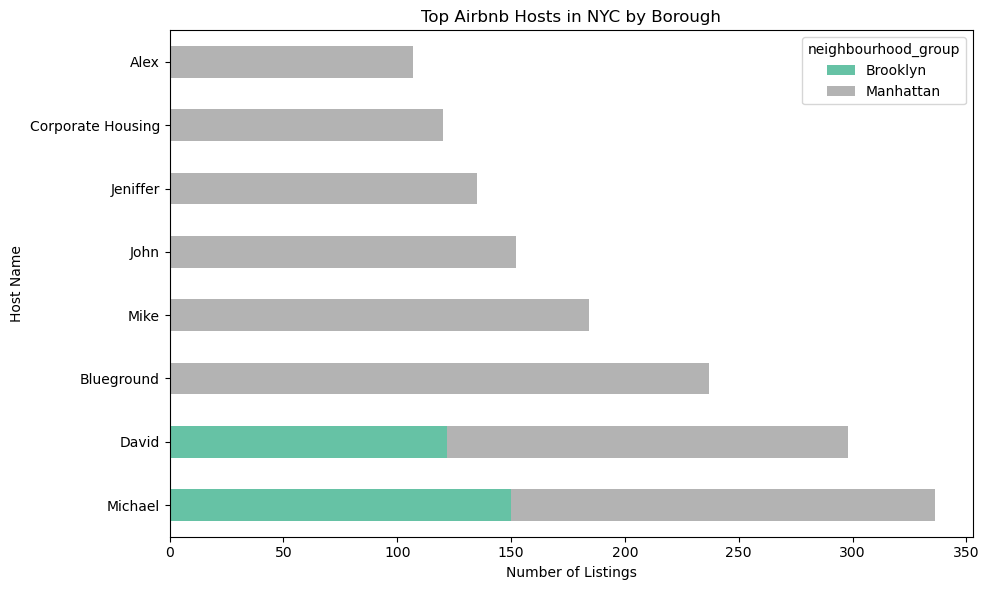

In [10]:
df_pivot = df.pivot_table(index="host_name", columns="neighbourhood_group", values="total_listings", aggfunc="sum", fill_value=0)

# Ordenar por total
df_pivot = df_pivot.loc[df_pivot.sum(axis=1).sort_values(ascending=False).index]

# Gráfico apilado
df_pivot.plot(kind="barh", stacked=True, figsize=(10,6), colormap="Set2")

plt.title("Top Airbnb Hosts in NYC by Borough")
plt.xlabel("Number of Listings")
plt.ylabel("Host Name")

plt.tight_layout()
plt.show()